<h1 style="text-align:center;font-size:30px;" > Stack Overflow: Tag Prediction </h1>

##### Please refer to this blog for detailed explanation: https://sachinkalsi.github.io/blog/category/ml/2018/08/22/stack-overflow-tag-prediction.html

<h1>1. Business Problem </h1>

<h2> 1.1 Description </h2>

<p style='font-size:18px'><b> Description </b></p>
<p>
Stack Overflow is the largest, most trusted online community for developers to learn, share their programming knowledge, and build their careers.<br />
<br />
Stack Overflow is something which every programmer use one way or another. Each month, over 50 million developers come to Stack Overflow to learn, share their knowledge, and build their careers. It features questions and answers on a wide range of topics in computer programming. The website serves as a platform for users to ask and answer questions, and, through membership and active participation, to vote questions and answers up or down and edit questions and answers in a fashion similar to a wiki or Digg. As of April 2014 Stack Overflow has over 4,000,000 registered users, and it exceeded 10,000,000 questions in late August 2015. Based on the type of tags assigned to questions, the top eight most discussed topics on the site are: Java, JavaScript, C#, PHP, Android, jQuery, Python and HTML.<br />
<br />
</p>

<p style='font-size:18px'><b> Problem Statemtent </b></p>
Suggest the tags based on the content that was there in the question posted on Stackoverflow.

<p style='font-size:18px'><b> Source:  </b> https://www.kaggle.com/c/facebook-recruiting-iii-keyword-extraction/</p>


<h2> 1.2 Real World / Business Objectives and Constraints </h2>

1. Predict as many tags as possible with high precision and recall.
2. Incorrect tags could impact customer experience on StackOverflow.
3. No strict latency constraints.

<h1>2. Machine Learning problem </h1>

<h2> 2.1 Data </h2>

<h3> 2.1.1 Data Overview </h3>

Refer: https://www.kaggle.com/c/facebook-recruiting-iii-keyword-extraction/data
<br>
All of the data is in 2 files: Train and Test.<br />
<pre>
<b>Train.csv</b> contains 4 columns: Id,Title,Body,Tags.<br />
<b>Test.csv</b> contains the same columns but without the Tags, which you are to predict.<br />
<b>Size of Train.csv</b> - 6.75GB<br />
<b>Size of Test.csv</b> - 2GB<br />
<b>Number of rows in Train.csv</b> = 6034195<br />
</pre>

__Data Field Explaination__

Dataset contains 6,034,195 rows. The columns in the table are:<br />
<pre>
<b>Id</b> - Unique identifier for each question<br />
<b>Title</b> - The question's title<br />
<b>Body</b> - The body of the question<br />
<b>Tags</b> - The tags associated with the question in a space-seperated format (all lowercase, should not contain tabs '\t' or ampersands '&')<br />
</pre>

<br />

<h3>2.1.2 Example Data point </h3>

<b>Id</b>: 5

<b>Title:</b> How to modify whois contact details?

<b>Body:</b>

<pre>
&lt;pre&gt;
    &lt;code&gt;
    function modify(.......)
    {
        $mcontact = file_get_contents( "https://test.httpapi.com/api/contacts/modify.json?auth-userid=$uid&amp;auth-password=$pass&amp;contact-id=$cid&amp;name=$name &amp;company=$company&amp;email=$email&amp;address-line-1=$street&amp;city=$city&amp;country=$country&amp;zipcode=$pincode&amp;phone-cc=$countryCodeList[$phc]&amp;phone=$phone" );
        $mdetails = json_decode( $mcontact, true );
        return $mdetails;
    }
    &lt;/code&gt;
&lt;/pre&gt;
&lt;p&gt;using this modify function, displays warning mesage&lt;/p&gt;
&lt;pre class="lang-none prettyprint-override">
    &lt;code&gt;
    Warning: file_get_contents(https://...@hihfg.com&amp;address-line-1=3,dfgdf,fgdf&amp;city=dfgfd&amp;country=India&amp;zipcode=641005&amp;phone-cc=91&amp;phone=756657)
        [function.file-get-contents]: failed to open stream: HTTP request failed!
        HTTP/1.0 400 Bad request in /home/gfdgfd/public_html/new_one/customer/account/class.whois.php on line 49\n
    &lt;/code&gt;
&lt;/pre&gt;
&lt;p&gt;Please help me, modify contact details.&lt;/p&gt;
</pre>

<b>Tags</b>: php api file-get-contents

<h2>2.2 Mapping the real-world problem to a Machine Learning Problem </h2>

<h3> 2.2.1 Type of Machine Learning Problem </h3>

<b>It is a multi-label classification problem.</b>

In Multi-label Classification, multiple labels (in this problem its tags) may be assigned to each instance and there is no constraint on how many of the classes the instance can be assigned to.
Source: [Wiki](https://en.wikipedia.org/wiki/Multi-label_classification)

Find more about multi-label classification problem [here](http://scikit-learn.org/stable/modules/multiclass.html)

### 2.2.2 Performance metric

1. Micro F1 score
2. Macro F1 score:

I have discussed in detail about the performance metrices in my one of my [blog](https://goo.gl/Z4AP95) post. Please read [this](https://goo.gl/UJdNps) blog to know more about Micro & Macro F1 scores.

<h1> 3. Exploratory Data Analysis </h1>

<h2> 3.1 Data Loading and Cleaning </h2>

In [43]:
import warnings
# warnings.filterwarnings("always")
warnings.filterwarnings("ignore")
import pandas as pd
import pickle
import sqlite3
import csv
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from wordcloud import WordCloud
import re
import os
import datetime as dt
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem.snowball import SnowballStemmer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import SGDClassifier
from sklearn import metrics
from sklearn.metrics import f1_score,precision_score,recall_score
from sklearn import svm
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from datetime import datetime
from collections import Counter
from sklearn.model_selection import GridSearchCV


In [ ]:
df_train = pd.read_csv('train.csv',nrows=1000000) #Due to hardware limitations, I am considering only 1000K points

In [4]:
df_train.head()

,Id,Title,Body,Tags
0,1,How to check if an uploaded file is an image w...,<p>I'd like to check if an uploaded file is an...,php image-processing file-upload upload mime-t...
1,2,How can I prevent firefox from closing when I ...,"<p>In my favorite editor (vim), I regularly us...",firefox
2,3,R Error Invalid type (list) for variable,<p>I am import matlab file and construct a dat...,r matlab machine-learning
3,4,How do I replace special characters in a URL?,"<p>This is probably very simple, but I simply ...",c# url encoding
4,5,How to modify whois contact details?,<pre><code>function modify(.......)\n{\n $mco...,php api file-get-contents


### Util

In [7]:
def save_file(data, file_name):
    with open(file_name+'.pickle', 'wb') as handle:
        pickle.dump(data, handle, protocol=pickle.HIGHEST_PROTOCOL)
        
def read_file(file_name):
    with open(file_name+'.pickle', 'rb') as handle:
        return pickle.load(handle)

###  Removing duplicates

In [6]:
number_of_rows_before_removing_duplicates = df_train.shape[0]
dup_df_train = df_train.groupby(['Title', 'Body', 'Tags']).size().reset_index(name='counts')
print("duplicate rows details:\n\n",dup_df_train['counts'].value_counts())
df_train.drop_duplicates(subset=['Title', 'Body', 'Tags'], inplace=True)
print("--"*10)
print("number of duplicate question: ", ((number_of_rows_before_removing_duplicates-df_train.shape[0])/number_of_rows_before_removing_duplicates)*100.0 , "%")
print("number of rows before removing duplicates: ", number_of_rows_before_removing_duplicates)
print("number of rows after removing duplicates: ", df_train.shape[0])

duplicate rows details:

 1    888457
2     53832
3      1293
Name: counts, dtype: int64
--------------------
number of duplicate question:  5.6418 %
number of rows before removing duplicates:  1000000
number of rows after removing duplicates:  943582


In [7]:
df_train.shape

(943582, 4)

In [8]:
df_train['tag_count'] = df_train['Tags'].apply(lambda text: len(text.strip().split()))

## Tag analysis

In [22]:
df_train.head()

,Id,Title,Body,Tags,tag_count
0,1,How to check if an uploaded file is an image w...,<p>I'd like to check if an uploaded file is an...,php image-processing file-upload upload mime-t...,5
1,2,How can I prevent firefox from closing when I ...,"<p>In my favorite editor (vim), I regularly us...",firefox,1
2,3,R Error Invalid type (list) for variable,<p>I am import matlab file and construct a dat...,r matlab machine-learning,3
3,4,How do I replace special characters in a URL?,"<p>This is probably very simple, but I simply ...",c# url encoding,3
4,5,How to modify whois contact details?,<pre><code>function modify(.......)\n{\n $mco...,php api file-get-contents,3


### Count unique tags

In [27]:
vectorizer = CountVectorizer(tokenizer = lambda x: x.split())
tag_dtm = vectorizer.fit_transform(df_train['Tags'])

In [36]:
print("Number of data points :", tag_dtm.shape[0])
print("Number of unique tags :", tag_dtm.shape[1])
tags = vectorizer.get_feature_names()
print("Top 10 important tags: ", tags[:10])

Number of data points : 943582
Number of unique tags : 34945
Top 10 important tags:  ['.a', '.app', '.aspxauth', '.bash-profile', '.class-file', '.cs-file', '.doc', '.drv', '.ds-store', '.each']


In [69]:
freqs = tag_dtm.sum(axis=0).A1
result = dict(zip(tags, freqs))
tag_df = pd.DataFrame(list(result.items()), columns=['Tags', 'Counts'])

In [9]:
if not os.path.isfile('pickle/tag_df.pickle'):
    save_file(tag_df,'pickle/tag_df')
tag_df = read_file('pickle/tag_df')

In [74]:
tag_df = tag_df.sort_values(['Counts'], ascending=False)
tag_counts = tag_df['Counts'].values

### Plot 'Tags' Vs 'frequency of their appearances'

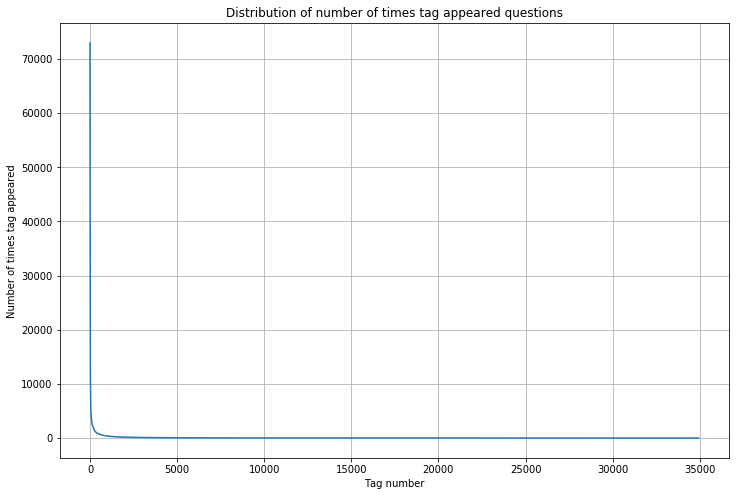

In [81]:
plt.figure(figsize=(12,8))
plt.plot(tag_counts)
plt.title("Distribution of number of times tag appeared questions")
plt.grid()
plt.xlabel("Tag number")
plt.ylabel("Number of times tag appeared")
plt.show()

### lets zoom in since it is highly skewed

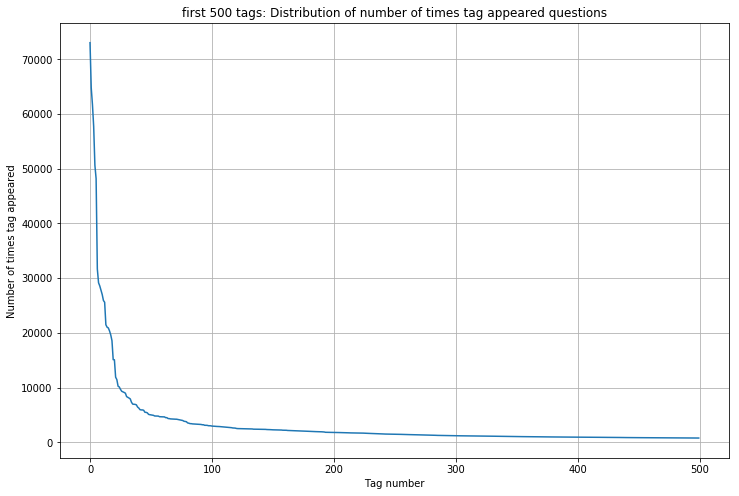

In [96]:
plt.figure(figsize=(12,8))
plt.plot(tag_counts[0:500])
plt.title('first 500 tags: Distribution of number of times tag appeared questions')
plt.grid()
plt.xlabel("Tag number")
plt.ylabel("Number of times tag appeared")
plt.show()

### lets zoom in more to find more details

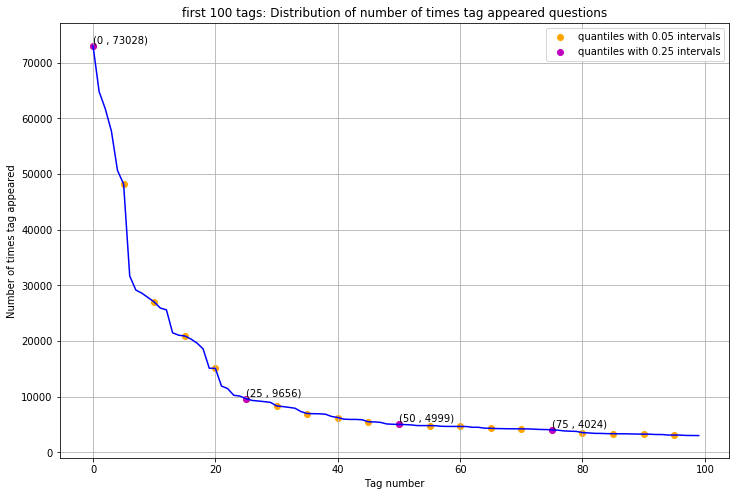

20 [73028 48180 26999 20891 15074  9656  8340  6965  6243  5476  4999  4790
  4637  4313  4211  4024  3534  3339  3270  3093]


In [97]:
plt.figure(figsize=(12,8))
plt.plot(tag_counts[0:100], c='b')
plt.scatter(x=list(range(0,100,5)), y=tag_counts[0:100:5], c='orange', label="quantiles with 0.05 intervals")
plt.scatter(x=list(range(0,100,25)), y=tag_counts[0:100:25], c='m', label = "quantiles with 0.25 intervals")
for x,y in zip(list(range(0,100,25)), tag_counts[0:100:25]):
    plt.annotate(s="({} , {})".format(x,y), xy=(x,y), xytext=(x-0.05, y+500))
plt.title('first 100 tags: Distribution of number of times tag appeared questions')
plt.grid()
plt.xlabel("Tag number")
plt.ylabel("Number of times tag appeared")
plt.legend()
plt.show()
print(len(tag_counts[0:100:5]), tag_counts[0:100:5])

In [100]:
print("total tags which are used more than 10K times:", len(tag_df[tag_df.Counts>10000].Tags))

total tags which are used more than 10K times: 25


### Tags Per Question

In [103]:
print( "Maximum number of tags per question: %d"%max(df_train['tag_count']))
print( "Minimum number of tags per question: %d"%min(df_train['tag_count']))
print( "Avg. number of tags per question: %f"% ((sum(df_train['tag_count'])*1.0)/df_train.shape[0]))

Maximum number of tags per question: 5
Minimum number of tags per question: 1
Avg. number of tags per question: 2.887779


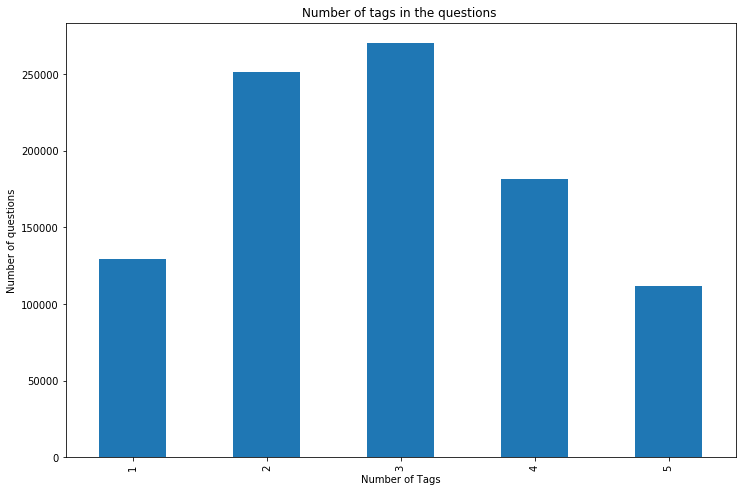

In [109]:
plt.figure(figsize=(12,8))
df_train['tag_count'].value_counts().sort_index().plot(kind='bar')
plt.title("Number of tags in the questions ")
plt.xlabel("Number of Tags")
plt.ylabel("Number of questions")
plt.show()

### Most Frequent Tags

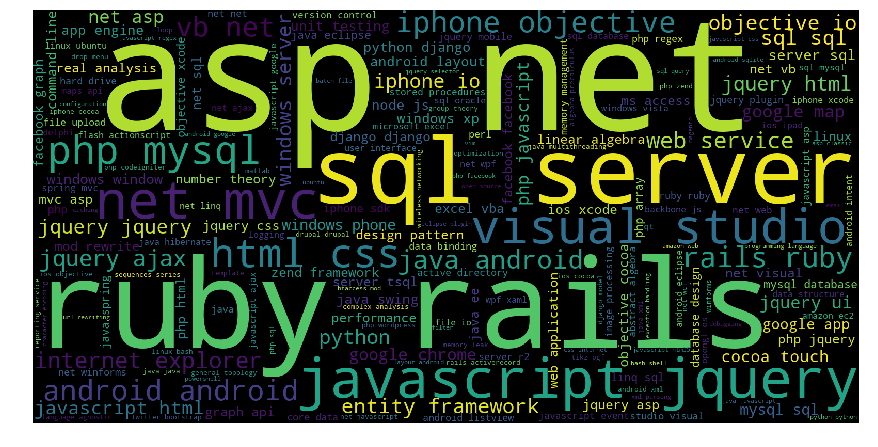

Time taken to run this cell : 0:00:22.831920


In [119]:
start = datetime.now()
frequent_tags = ' '.join(df_train['Tags'].values)
wordcloud = WordCloud(width=1600, height=800, margin=0).generate(frequent_tags)

plt.figure(figsize=(12,8))
plt.imshow(wordcloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.margins(x=0, y=0)
plt.show()
print("Time taken to run this cell :", datetime.now() - start)

### The top 20 tags

In [120]:
tag_df.head()

,Tags,Counts
3606,c#,73028
15026,java,64770
22632,php,61712
15100,javascript,57722
1020,android,50630


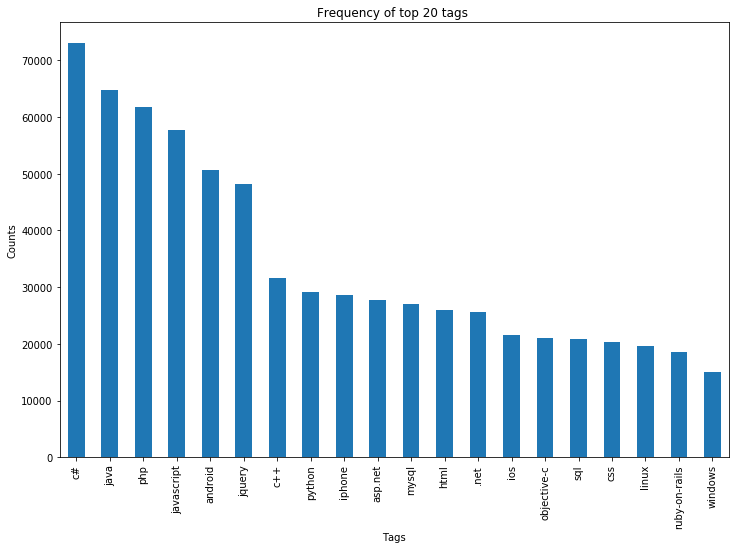

In [125]:
plt.figure(figsize=(12,8))
tag_df['Counts'].head(20).plot(kind='bar')
plt.xticks(np.arange(20), tag_df['Tags'])
plt.title("Frequency of top 20 tags ")
plt.xlabel("Tags")
plt.ylabel("Counts")
plt.show()

### Observations from EDA

1. <b>Number of rows in the database:</b> 1000000
2. <b>5.6% of the questions are duplicate:</b> Number of rows after removing duplicates:  943582
3. <b>Number of unique tags:</b> 34945
4. <b>Top 10 important tags:</b>  ['.a', '.app', '.aspxauth', '.bash-profile', '.class-file', '.cs-file', '.doc', '.drv', '.ds-store', '.each']
5. Few number of tags have appeared more than 50000 times & the top 25 tags have appeared more than 10000 times
6. <h3>Tags analysis</h3>
    1. Maximum number of tags per question: 5
    2. Minimum number of tags per question: 1
    3. Avg. number of tags per question: 2.887779
    4. Questions with 3 tags appeared more in number
    5. <b>`asp.net`, `ruby rails`</b> are highligted in Word cloud of tags
    6. <b>`C#`</b> appears most number of times, <b>`Java`</b> is the second most. Majority of the most frequent tags are programming language.


## Cleaning and preprocessing of Questions 


<i>P.S: <b>Due to hardware limitations, I am considering only 500K data points</b></i>

In [140]:
print("shape of data before training: ", df_train.shape)
df_train = df_train[:500000] # Due to hardware limitations, I am considering only 500K data points
print("shape of data after training: ", df_train.shape)

shape of data before training:  (943582, 5)
shape of data after training:  (500000, 5)


In [163]:
question_containing_codes = sum(df_train['Body'].apply(lambda txt: '<code>' in txt))
print("Questions containg HTML tag 'code': ", question_containing_codes)
print("Percentage of Questions containing HTML tag 'code': {}% ".format(round((question_containing_codes/df_train.shape[0])*100.0, 2)))

Questions containg HTML tag 'code':  281828
Percentage of Questions containing HTML tag 'code': 56.37% 


In [164]:
df_train.head()

,Id,Title,Body,Tags,tag_count
0,1,How to check if an uploaded file is an image w...,<p>I'd like to check if an uploaded file is an...,php image-processing file-upload upload mime-t...,5
1,2,How can I prevent firefox from closing when I ...,"<p>In my favorite editor (vim), I regularly us...",firefox,1
2,3,R Error Invalid type (list) for variable,<p>I am import matlab file and construct a dat...,r matlab machine-learning,3
3,4,How do I replace special characters in a URL?,"<p>This is probably very simple, but I simply ...",c# url encoding,3
4,5,How to modify whois contact details?,<pre><code>function modify(.......)\n{\n $mco...,php api file-get-contents,3


## Preprocessing
<ol>
   <li>56.37% percentage of questions contains HTML tag &lt;code&gt; tag. So separate out code-snippets from  the Body</li>
  <li>Remove Spcial characters from title and Body (not in code)</li>
  <li><b>Remove stop words (Except 'C')</b></li>
  <li>Remove HTML Tags</li>
  <li>Convert all the characters into small letters</li>
  <li>Use SnowballStemmer to stem the words.<br><br>
  <i>Stemming is the process of reducing a word to its word stem. <br>
  <b>For Example:</b> "python" is the stem word for the words ["python" "pythoner", "pythoning","pythoned"]</i></li>
  <li><b>Give more weightage to title: Add title three times to the question</b>. Title contains the information which is more specific to the question and also only after seeing the question title, a user decides whether to look into the question in detail. At least most of the users do this if not all </li>
</ol>

In [181]:
stop_words = set(stopwords.words('english'))
stemmer = SnowballStemmer("english")
def striphtml(data):
    cleanr = re.compile('<.*?>')
    cleantext = re.sub(cleanr, ' ', str(data))
    return cleantext

In [357]:
start = datetime.now()
processed_questions = []
questions_proccesed = 0
for index, row in df_train.iterrows():
    title, question = row['Title'], row['Body']
    question=re.sub('<code>(.*?)</code>', '', question, flags=re.MULTILINE|re.DOTALL)
    question=striphtml(question.encode('utf-8'))
    title=title.encode('utf-8')
    question=(str(title) + " " )*3+" "+str(question)
    question=re.sub(r'[^A-Za-z]+',' ',question)
    words=word_tokenize(str(question.lower()))
    #Removing all single letter and and stopwords from question exceptt for the letter 'c'
    question=' '.join(str(stemmer.stem(j)) for j in words if j not in stop_words and (len(j)!=1 or j=='c'))
    questions_proccesed += 1
    processed_questions.append(question)
    if (questions_proccesed%100000==0):
        print("number of questions completed=",questions_proccesed)
print("Time taken to run this cell :", datetime.now() - start)

number of questions completed= 100000
number of questions completed= 200000
number of questions completed= 300000
number of questions completed= 400000
number of questions completed= 500000
Time taken to run this cell : 0:19:37.210217


In [358]:
print('Questions after preprocessed')
print('___'*20)
for q in processed_questions[:5]:
    print(q)
    print('____'*25)

Questions after preprocessed
____________________________________________________________
check upload file imag without mime type check upload file imag without mime type check upload file imag without mime type like check upload file imag file png jpg jpeg gif bmp anoth file problem use uploadifi upload file chang mime type give text octal someth mime type matter file type upload way check upload file imag apart check file extens use php
____________________________________________________________________________________________________
prevent firefox close press ctrl prevent firefox close press ctrl prevent firefox close press ctrl favorit editor vim regular use ctrl execut certain action quit often happen firefox activ window window still look vim think vim activ window press ctrl close firefox want way stop ctrl close firefox rene
____________________________________________________________________________________________________
error invalid type list variabl error invalid type

In [359]:
tags = df_train['Tags']
preprocessed_title_more_weight_df = pd.DataFrame({'tags':tags, 'questions': processed_questions})
preprocessed_title_more_weight_df.head()

,questions,tags
0,check upload file imag without mime type check...,php image-processing file-upload upload mime-t...
1,prevent firefox close press ctrl prevent firef...,firefox
2,error invalid type list variabl error invalid ...,r matlab machine-learning
3,replac special charact url replac special char...,c# url encoding
4,modifi whoi contact detail modifi whoi contact...,php api file-get-contents


In [5]:
if not os.path.isfile('pickle/preprocessed_title_more_weight_df.pickle'):
    save_file(preprocessed_title_more_weight_df, 'pickle/preprocessed_title_more_weight_df') # save it to pickle file
preprocessed_title_more_weight_df = read_file('pickle/preprocessed_title_more_weight_df')

# Machine Learning Models

In [361]:
preprocessed_title_more_weight_df.shape

(500000, 2)

In [362]:
vectorizer = CountVectorizer(tokenizer = lambda x: x.split(), binary='true')
multilabel_y = vectorizer.fit_transform(preprocessed_title_more_weight_df['tags'])
print("Total number of questions: ", multilabel_y.shape[0])
print("Total number of TAGS: ", multilabel_y.shape[1])

Total number of questions:  500000
Total number of TAGS:  30645


Here we are going to use <i><b>Problem Transformation(Binary Relevance)</b></i> method to solve the problem.

<h3>Binary Relevance:</h3><br> Here we are going to convert multi-label classification problem into multiple single class classification problems.For example if we are having 5 multi-label classification problem, then we need to train 5 single class classification models.

 Basically in this method, we treat each label (in our case its tag) as a separate single class classification problem. This technique is simple and is widely used.

Please refer to [analytics vidhya's blog](https://www.analyticsvidhya.com/blog/2017/08/introduction-to-multi-label-classification/) to know more about the techniques to solve a Multi-Label classification problem.

### We will sample the number of tags instead considering all of them (due to limitation of computing power)

<h3>Downscaling of data</h3><br>
Coming back to our stackoverflow predictor problem, we need to train 30645 models literally!!!
Thats really huge (both in terms of time & speed) for a system with 8GM RAM & i5 processor. So we will sample the number of tags instead considering all of them. But how many tags to be sampled with the minimal information loss ? Plotting 'percentage of questions covered' Vs 'Number of tags' would help to solve this.

In [9]:
def tags_to_choose(n):
    t = multilabel_y.sum(axis=0).tolist()[0]
    sorted_tags_i = np.argsort(t)[::-1]
    multilabel_yn=multilabel_y[:,sorted_tags_i[:n]]
    return multilabel_yn

def questions_explained_fn(n):
    multilabel_yn = tags_to_choose(n)
    x= multilabel_yn.sum(axis=1)
    return (np.count_nonzero(x==0))

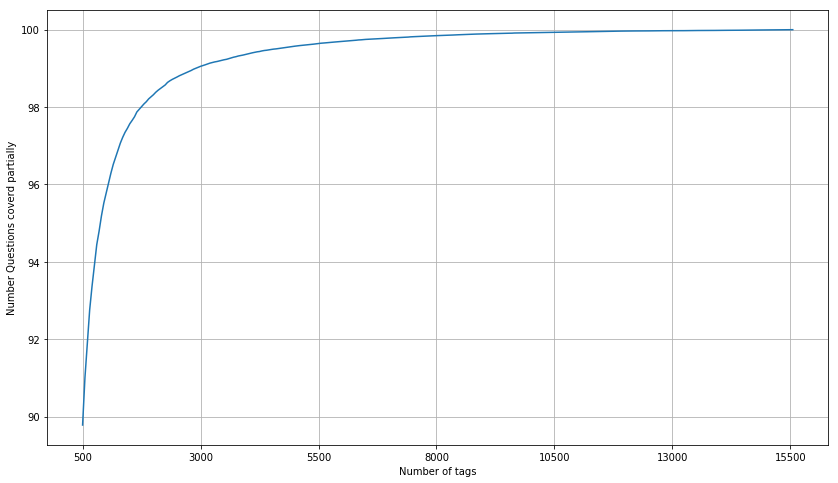

In [366]:
questions_explained = []
total_tags=multilabel_y.shape[1]
total_qs=multilabel_y.shape[0]
for i in range(500, total_tags, 100):
    questions_explained.append(np.round(((total_qs-questions_explained_fn(i))/total_qs)*100,3))
    
fig, ax = plt.subplots()
fig.set_figheight(8)
fig.set_figwidth(14)
ax.plot(questions_explained)
xlabel = list(500+np.array(range(-50,450,50))*50)
ax.set_xticklabels(xlabel)
plt.xlabel("Number of tags")
plt.ylabel("Number Questions coverd partially")
plt.grid()
plt.show()

In [4]:
tag_counts = np.arange(500, total_tags, 100)
print("with ",500,"tags we are covering ",questions_explained[list(tag_counts).index(500)],"% of questions")
print("with ",600,"tags we are covering ",questions_explained[list(tag_counts).index(600)],"% of questions")
print("with ",5500,"tags we are covering ",questions_explained[list(tag_counts).index(5500)],"% of questions")

with  500 tags we are covering  89.782 % of questions
with  600 tags we are covering  91.006 % of questions
with  5500 tags we are covering  99.053 % of questions


### By using only 600 tags (2% approximately) of the total 30645 tags we are loosing only 9% of the questions & also training 600 models is reasonable (Of course it also depends on the type of machine learning algo we choose). So we shall choose 600 tags.

In [384]:
# we will be taking 600 tags
multilabel_yx = tags_to_choose(600)
print("number of questions that are not covered :", questions_explained_fn(600),"out of ", total_qs)

number of questions that are not covered : 44972 out of  500000


### Train and Test data


In [394]:
preprocessed_title_more_weight_df.head()

,questions,tags
0,check upload file imag without mime type check...,php image-processing file-upload upload mime-t...
1,prevent firefox close press ctrl prevent firef...,firefox
2,error invalid type list variabl error invalid ...,r matlab machine-learning
3,replac special charact url replac special char...,c# url encoding
4,modifi whoi contact detail modifi whoi contact...,php api file-get-contents


In [392]:
train_datasize=0.8*preprocessed_title_more_weight_df.shape[0]
x_train=preprocessed_title_more_weight_df[:int(train_datasize)]
x_test=preprocessed_title_more_weight_df[int(train_datasize):]
y_train = multilabel_yx[0:train_datasize,:]
y_test = multilabel_yx[train_datasize:,:]

In [393]:
print("Number of data points in train data :", y_train.shape)
print("Number of data points in test data :", y_test.shape)

Number of data points in train data : (400000, 600)
Number of data points in test data : (100000, 600)


### Featurizing data with TfIdf vectorizer  upto 3 grams

### There are various ways to featurize text data. I have explained this deeply in my [blog](https://goo.gl/g1cB6z) post. First lets featurize the question data with TfIdf vectorizer. [TfidfVectorizer](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html) of sklearn helps here

In [396]:
start = datetime.now()
vectorizer = TfidfVectorizer(min_df=0.00009, max_features=200000, smooth_idf=True, norm="l2", \
                             sublinear_tf=False, ngram_range=(1,3))
x_train_multilabel = vectorizer.fit_transform(x_train['questions'])
x_test_multilabel = vectorizer.transform(x_test['questions'])
print("Time taken to run this cell :", datetime.now() - start)

Time taken to run this cell : 0:08:08.437254


In [397]:
print("Dimensions of train data X:",x_train_multilabel.shape, "Y :",y_train.shape)
print("Dimensions of test data X:",x_test_multilabel.shape,"Y:",y_test.shape)

Dimensions of train data X: (400000, 90809) Y : (400000, 600)
Dimensions of test data X: (100000, 90809) Y: (100000, 600)


#### Applying Logistic Regression with OneVsRest Classifier 

In [399]:
start = datetime.now()
classifier = OneVsRestClassifier(LogisticRegression(penalty='l1'), n_jobs=-1)
classifier.fit(x_train_multilabel, y_train)
predictions = classifier.predict(x_test_multilabel)
print("Time taken to run this cell :", datetime.now() - start)

Time taken to run this cell : 2:29:12.824184


In [417]:
print("Accuracy :",metrics.accuracy_score(y_test, predictions))
print("Hamming loss ",metrics.hamming_loss(y_test,predictions))
print("==="*30)
precision = precision_score(y_test, predictions, average='micro')
recall = recall_score(y_test, predictions, average='micro')
f1 = f1_score(y_test, predictions, average='micro')
 
print("Micro-average quality numbers")
print("Precision: {:.4f}, Recall: {:.4f}, F1-measure: {:.4f}".format(precision, recall, f1))
print("==="*30)
precision = precision_score(y_test, predictions, average='macro')
recall = recall_score(y_test, predictions, average='macro')
f1 = f1_score(y_test, predictions, average='macro')
 
print("Macro-average quality numbers")
print("Precision: {:.4f}, Recall: {:.4f}, F1-measure: {:.4f}".format(precision, recall, f1))
print("==="*30)

print(metrics.classification_report(y_test, predictions)[:500])

Accuracy : 0.22966
Hamming loss  0.0024082166666666667
Micro-average quality numbers
Precision: 0.7125, Recall: 0.3792, F1-measure: 0.4950
Macro-average quality numbers
Precision: 0.5537, Recall: 0.3070, F1-measure: 0.3809
             precision    recall  f1-score   support

          0       0.61      0.23      0.34      7767
          1       0.80      0.50      0.61      6745
          2       0.85      0.58      0.69      6625
          3       0.75      0.47      0.57      6101
          4       0.95      0.80      0.87      5369
          5       0.88      0.66      0.75      5265
          6       0.74      0.33      0.46      3366
          7       0.87      0.65      0.75      3110
          8       0.72


## <u>Results</u>

Micro F1-measure: 0.4950

Macro F1-measure: 0.3809

### Featurizing Text Data with Bag Of Words (BOW) vectorizer upto 4 grams

<b>P.S:</b><i> I did try Featurizing Text Data with Bag Of Words, but my system was giving out of memory error. So again I have to downscale the data to 100K.</i> 

In [11]:
downscaled_weight_df = preprocessed_title_more_weight_df[:100000]
print(downscaled_weight_df.shape)

(100000, 2)


In [12]:
vectorizer = CountVectorizer(tokenizer = lambda x: x.split(), binary='true')
multilabel_y = vectorizer.fit_transform(downscaled_weight_df['tags'])
print("Total number of questions: ", multilabel_y.shape[0])
print("Total number of TAGS: ", multilabel_y.shape[1])

Total number of questions:  100000
Total number of TAGS:  18487


###  18487 tags is very large for a normal system to process, so lets reduce the number of tags with minimal loss of questions

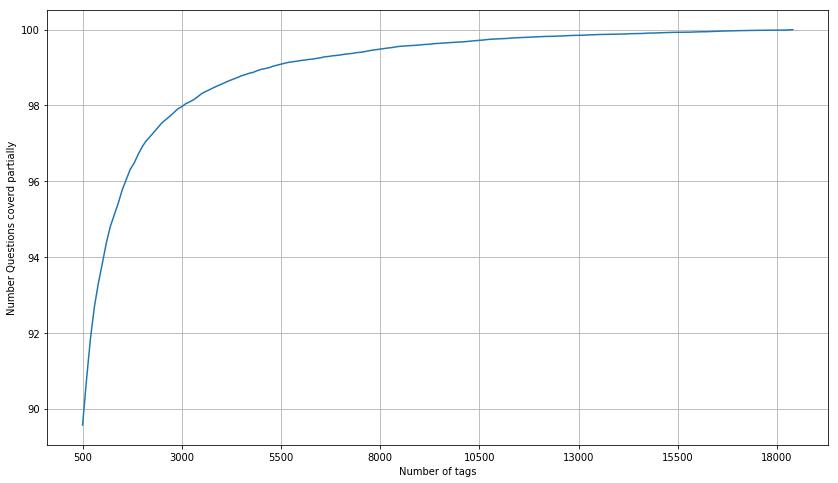

In [13]:
questions_explained = []
total_tags=multilabel_y.shape[1]
total_qs=multilabel_y.shape[0]
for i in range(500, total_tags, 100):
    questions_explained.append(np.round(((total_qs-questions_explained_fn(i))/total_qs)*100,3))
    
fig, ax = plt.subplots()
fig.set_figheight(8)
fig.set_figwidth(14)
ax.plot(questions_explained)
xlabel = list(500+np.array(range(-50,450,50))*50)
ax.set_xticklabels(xlabel)
plt.xlabel("Number of tags")
plt.ylabel("Number Questions coverd partially")
plt.grid()
plt.show()

In [14]:
tag_counts = np.arange(500, total_tags, 100)
print("with ",500,"tags we are covering ",questions_explained[list(tag_counts).index(500)],"% of questions")
print("with ",600,"tags we are covering ",questions_explained[list(tag_counts).index(600)],"% of questions")
print("with ",1000,"tags we are covering ",questions_explained[list(tag_counts).index(1000)],"% of questions")

with  500 tags we are covering  89.566 % of questions
with  600 tags we are covering  90.775 % of questions
with  1000 tags we are covering  93.841 % of questions


### lets choose 600 tags as we would cover 90.7% of the questions

In [13]:
multilabel_yx = tags_to_choose(600)

In [14]:
train_datasize=0.80*downscaled_weight_df.shape[0]
x_train=downscaled_weight_df[:int(train_datasize)]
x_test=downscaled_weight_df[int(train_datasize):]
y_train = multilabel_yx[0:train_datasize,:]
y_test = multilabel_yx[train_datasize:,:]
print("Number of data points in train data :", y_train.shape)
print("Number of data points in test data :", y_test.shape)

Number of data points in train data : (80000, 600)
Number of data points in test data : (20000, 600)


In [15]:
start = datetime.now()
vectorizer = CountVectorizer(min_df=0.00001,max_features=200000, ngram_range=(1,4))
x_train_multilabel = vectorizer.fit_transform(x_train['questions'])
x_test_multilabel = vectorizer.transform(x_test['questions'])
print("Time taken to run this cell :", datetime.now() - start)

Time taken to run this cell : 0:01:34.747168


In [16]:
print("Dimensions of train data X:",x_train_multilabel.shape, "Y :",y_train.shape)
print("Dimensions of test data X:",x_test_multilabel.shape,"Y:",y_test.shape)

Dimensions of train data X: (80000, 200000) Y : (80000, 600)
Dimensions of test data X: (20000, 200000) Y: (20000, 600)


In [33]:
start = datetime.now()
classifier = OneVsRestClassifier(LogisticRegression(penalty='l1'))
classifier.fit(x_train_multilabel, y_train)
predictions = classifier.predict(x_test_multilabel)
print("Time taken to run this cell :", datetime.now() - start)

Time taken to run this cell : 1:24:58.259874


In [34]:
print("Accuracy :",metrics.accuracy_score(y_test, predictions))
print("Hamming loss ",metrics.hamming_loss(y_test,predictions))
print("==="*30)
precision = precision_score(y_test, predictions, average='micro')
recall = recall_score(y_test, predictions, average='micro')
f1 = f1_score(y_test, predictions, average='micro')
 
print("Micro-average quality numbers")
print("Precision: {:.4f}, Recall: {:.4f}, F1-measure: {:.4f}".format(precision, recall, f1))
print("==="*30)
precision = precision_score(y_test, predictions, average='macro')
recall = recall_score(y_test, predictions, average='macro')
f1 = f1_score(y_test, predictions, average='macro')
 
print("Macro-average quality numbers")
print("Precision: {:.4f}, Recall: {:.4f}, F1-measure: {:.4f}".format(precision, recall, f1))
print("==="*30)

print(metrics.classification_report(y_test, predictions)[:500])

Accuracy : 0.1997
Hamming loss  0.002708166666666667
Micro-average quality numbers
Precision: 0.5949, Recall: 0.3997, F1-measure: 0.4781
Macro-average quality numbers
Precision: 0.4472, Recall: 0.3208, F1-measure: 0.3655
             precision    recall  f1-score   support

          0       0.46      0.26      0.34      1567
          1       0.72      0.51      0.60      1338
          2       0.77      0.60      0.68      1326
          3       0.67      0.47      0.55      1261
          4       0.93      0.83      0.87      1040
          5       0.82      0.67      0.74      1015
          6       0.57      0.33      0.42       657
          7       0.85      0.71      0.77       625
          8       0.65


### <u> Results</u>

Micro F1-measure: 0.4781

Macro F1-measure: 0.3655

## hyperparam tuning on alpha (or lambda) for Logistic regression to improve the performance using GridSearch

In [72]:
x_train_multilabel.shape, y_train.shape

((80000, 200000), (80000, 600))

In [75]:
start = datetime.now()
c = [1e-3, 1e-2, 1e-1,1, 1e+1, 1e+2, 1e+3]
param_grid = {'estimator__C':c}
clf = OneVsRestClassifier(LogisticRegression(penalty='l1',multi_class='ovr'))
grid_search = GridSearchCV(clf,param_grid=param_grid, scoring='f1_micro')
grid_search.fit(x_train_multilabel, y_train)
print("Time taken to run this cell :", datetime.now() - start)

Time taken to run this cell : 9:07:28.129704


In [78]:
grid_search.best_estimator_

OneVsRestClassifier(estimator=LogisticRegression(C=10.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l1', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
          n_jobs=1)

In [84]:
grid_search.best_params_

{'estimator__C': 10.0}

In [85]:
start = datetime.now()
classifier = OneVsRestClassifier(LogisticRegression(penalty='l1', C=grid_search.best_params_['estimator__C']), n_jobs=-1)
classifier.fit(x_train_multilabel, y_train)
predictions = classifier.predict(x_test_multilabel)
print("Time taken to run this cell :", datetime.now() - start)

Time taken to run this cell : 0:41:48.065761


In [86]:
print("Accuracy :",metrics.accuracy_score(y_test, predictions))
print("Hamming loss ",metrics.hamming_loss(y_test,predictions))
print("==="*30)
precision = precision_score(y_test, predictions, average='micro')
recall = recall_score(y_test, predictions, average='micro')
f1 = f1_score(y_test, predictions, average='micro')
 
print("Micro-average quality numbers")
print("Precision: {:.4f}, Recall: {:.4f}, F1-measure: {:.4f}".format(precision, recall, f1))
print("==="*30)
precision = precision_score(y_test, predictions, average='macro')
recall = recall_score(y_test, predictions, average='macro')
f1 = f1_score(y_test, predictions, average='macro')
 
print("Macro-average quality numbers")
print("Precision: {:.4f}, Recall: {:.4f}, F1-measure: {:.4f}".format(precision, recall, f1))
print("==="*30)

print(metrics.classification_report(y_test, predictions)[:500])

Accuracy : 0.1958
Hamming loss  0.0027495833333333335
Micro-average quality numbers
Precision: 0.5821, Recall: 0.4047, F1-measure: 0.4774
Macro-average quality numbers
Precision: 0.4481, Recall: 0.3245, F1-measure: 0.3676
             precision    recall  f1-score   support

          0       0.42      0.28      0.34      1567
          1       0.68      0.52      0.59      1338
          2       0.76      0.62      0.68      1326
          3       0.63      0.48      0.54      1261
          4       0.92      0.82      0.87      1040
          5       0.79      0.67      0.72      1015
          6       0.52      0.35      0.42       657
          7       0.84      0.71      0.77       625
          8       0.62


### Observations
 Logistic Regression with c=1 performed better when compared to Logistic Regression with c=10 , so lets do a grid search for more values of c i.e,  2,4,6,8

In [18]:
start = datetime.now()
c = [2, 4, 6, 8]
param_grid = {'estimator__C':c}
clf = OneVsRestClassifier(LogisticRegression(penalty='l1',multi_class='ovr'))
grid_search = GridSearchCV(clf,param_grid=param_grid, scoring='f1_micro')
grid_search.fit(x_train_multilabel, y_train)
print("Time taken to run this cell :", datetime.now() - start)

Time taken to run this cell : 6:48:06.070879


In [19]:
grid_search.best_params_

{'estimator__C': 6}

In [20]:
grid_search.cv_results_

{'mean_fit_time': array([2255.25177471, 1836.71453261, 1599.79829025, 1591.12371294]),
 'mean_score_time': array([6.7093521 , 6.42873343, 6.17167974, 6.07137092]),
 'mean_test_score': array([0.46748194, 0.4674771 , 0.46758774, 0.46722328]),
 'mean_train_score': array([0.99856035, 0.99994113, 0.99996468, 0.99997476]),
 'param_estimator__C': masked_array(data=[2, 4, 6, 8],
              mask=[False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'estimator__C': 2},
  {'estimator__C': 4},
  {'estimator__C': 6},
  {'estimator__C': 8}],
 'rank_test_score': array([2, 3, 1, 4], dtype=int32),
 'split0_test_score': array([0.46709539, 0.46743731, 0.46760383, 0.46758508]),
 'split0_train_score': array([0.99858593, 0.9999342 , 0.99995951, 0.99996457]),
 'split1_test_score': array([0.46757576, 0.46675412, 0.46689996, 0.46600985]),
 'split1_train_score': array([0.99846224, 0.99994966, 0.99997986, 0.99998993]),
 'split2_test_score': array([0.46777469, 0.4682399

In [21]:
start = datetime.now()
classifier = OneVsRestClassifier(LogisticRegression(penalty='l1', C=grid_search.best_params_['estimator__C']), n_jobs=-1)
classifier.fit(x_train_multilabel, y_train)
predictions = classifier.predict(x_test_multilabel)
print("Time taken to run this cell :", datetime.now() - start)

Time taken to run this cell : 0:39:18.744929


In [22]:
print("Accuracy :",metrics.accuracy_score(y_test, predictions))
print("Hamming loss ",metrics.hamming_loss(y_test,predictions))
print("==="*30)
precision = precision_score(y_test, predictions, average='micro')
recall = recall_score(y_test, predictions, average='micro')
f1 = f1_score(y_test, predictions, average='micro')
 
print("Micro-average quality numbers")
print("Precision: {:.4f}, Recall: {:.4f}, F1-measure: {:.4f}".format(precision, recall, f1))
print("==="*30)
precision = precision_score(y_test, predictions, average='macro')
recall = recall_score(y_test, predictions, average='macro')
f1 = f1_score(y_test, predictions, average='macro')
 
print("Macro-average quality numbers")
print("Precision: {:.4f}, Recall: {:.4f}, F1-measure: {:.4f}".format(precision, recall, f1))
print("==="*30)

print(metrics.classification_report(y_test, predictions)[:500])

Accuracy : 0.19625
Hamming loss  0.00274625
Micro-average quality numbers
Precision: 0.5829, Recall: 0.4051, F1-measure: 0.4780
Macro-average quality numbers
Precision: 0.4468, Recall: 0.3251, F1-measure: 0.3678
             precision    recall  f1-score   support

          0       0.42      0.28      0.34      1567
          1       0.68      0.52      0.59      1338
          2       0.76      0.62      0.68      1326
          3       0.63      0.48      0.54      1261
          4       0.92      0.82      0.87      1040
          5       0.79      0.67      0.72      1015
          6       0.52      0.34      0.41       657
          7       0.84      0.71      0.77       625
          8       0.62


## Observation
1. Performance improved in Logistic regression model when c=6 than when c=10
2. But still Logistic regression without hyper parameter tuning performed bit better than the hypertuned logistic regression model. It is may be because of small amount of data. <i> If we take large data, then hypertuned logistic regression might perform better than the non-hypertuned logistic regression.</i>
3. Results
    1. Micro F1 Score: 0.4780
    2. Macro F1 Score: 0.3678

## OneVsRestClassifier  with Linear-SVM (SGDClassifier with loss-hinge)


### Linear-SVM (BOW vectorizer, n_gram=(1,4)

In [49]:
start = datetime.now()
estimator__alpha = [1e-5, 1e-4, 1e-3, 1e-2, 1e-1,1, 1e+1, 1e+2]
param_grid = {'estimator__alpha':estimator__alpha}
clf = OneVsRestClassifier(SGDClassifier(loss='hinge', penalty='l1', max_iter=1000,tol=0.0001 ))
grid_search = GridSearchCV(clf,param_grid=param_grid, scoring='f1_micro')
grid_search.fit(x_train_multilabel, y_train)
print("Time taken to run this cell :", datetime.now() - start)

Time taken to run this cell : 15:59:49.642052


In [50]:
grid_search.best_params_['estimator__alpha']

0.001

In [51]:
start = datetime.now()
classifier = OneVsRestClassifier(SGDClassifier(loss='hinge', alpha=grid_search.best_params_['estimator__alpha'], penalty='l1',  max_iter=1000,tol=0.0001 ), n_jobs=-1)
classifier.fit(x_train_multilabel, y_train)
predictions = classifier.predict(x_test_multilabel)
print("Time taken to run this cell :", datetime.now() - start)

Time taken to run this cell : 0:41:46.857106


In [52]:
print("Accuracy :",metrics.accuracy_score(y_test, predictions))
print("Hamming loss ",metrics.hamming_loss(y_test,predictions))
print("==="*30)
precision = precision_score(y_test, predictions, average='micro')
recall = recall_score(y_test, predictions, average='micro')
f1 = f1_score(y_test, predictions, average='micro')
 
print("Micro-average quality numbers")
print("Precision: {:.4f}, Recall: {:.4f}, F1-measure: {:.4f}".format(precision, recall, f1))
print("==="*30)
precision = precision_score(y_test, predictions, average='macro')
recall = recall_score(y_test, predictions, average='macro')
f1 = f1_score(y_test, predictions, average='macro')
 
print("Macro-average quality numbers")
print("Precision: {:.4f}, Recall: {:.4f}, F1-measure: {:.4f}".format(precision, recall, f1))
print("==="*30)

print(metrics.classification_report(y_test, predictions)[:500])

Accuracy : 0.1798
Hamming loss  0.0027170833333333335
Micro-average quality numbers
Precision: 0.6353, Recall: 0.2926, F1-measure: 0.4007
Macro-average quality numbers
Precision: 0.3169, Recall: 0.2206, F1-measure: 0.2430
             precision    recall  f1-score   support

          0       0.54      0.05      0.09      1567
          1       0.78      0.35      0.48      1338
          2       0.84      0.50      0.63      1326
          3       0.81      0.33      0.47      1261
          4       0.91      0.73      0.81      1040
          5       0.84      0.67      0.75      1015
          6       0.74      0.14      0.24       657
          7       0.81      0.68      0.74       625
          8       0.71


## <u>Results</u>

1. Micro F1 Score:  0.4007
2. Macro F1 Score: 0.243

###  Linear-SVM (tfidf vectorizer, n_gram=(1, 3))

In [61]:
start = datetime.now()
vectorizer = TfidfVectorizer(min_df=0.00009, max_features=200000, smooth_idf=True, norm="l2", \
                             sublinear_tf=False, ngram_range=(1,3))
x_train_multilabel = vectorizer.fit_transform(x_train['questions'])
x_test_multilabel = vectorizer.transform(x_test['questions'])
print("Time taken to run this cell :", datetime.now() - start)

Time taken to run this cell : 0:00:55.964853


In [67]:
print("Dimensions of train data X:",x_train_multilabel.shape, "Y :",y_train.shape)
print("Dimensions of test data X:",x_test_multilabel.shape,"Y:",y_test.shape)

Dimensions of train data X: (80000, 90908) Y : (80000, 600)
Dimensions of test data X: (20000, 90908) Y: (20000, 600)


In [68]:
start = datetime.now()
estimator__alpha = [1e-5, 1e-4, 1e-3, 1e-2, 1e-1,1, 1e+1, 1e+2]
param_grid = {'estimator__alpha':estimator__alpha}
clf = OneVsRestClassifier(SGDClassifier(loss='hinge', penalty='l1', max_iter=1000,tol=0.0001 ))
grid_search = GridSearchCV(clf,param_grid=param_grid, scoring='f1_micro')
grid_search.fit(x_train_multilabel, y_train)
print("Time taken to run this cell :", datetime.now() - start)

Time taken to run this cell : 3:09:51.509128


In [69]:
grid_search.best_params_['estimator__alpha']

1e-05

In [70]:
start = datetime.now()
classifier = OneVsRestClassifier(SGDClassifier(loss='hinge', alpha=grid_search.best_params_['estimator__alpha'], penalty='l1',  max_iter=1000,tol=0.0001 ), n_jobs=-1)
classifier.fit(x_train_multilabel, y_train)
predictions = classifier.predict(x_test_multilabel)
print("Time taken to run this cell :", datetime.now() - start)

Time taken to run this cell : 0:02:34.664675


In [71]:
print("Accuracy :",metrics.accuracy_score(y_test, predictions))
print("Hamming loss ",metrics.hamming_loss(y_test,predictions))
print("==="*30)
precision = precision_score(y_test, predictions, average='micro')
recall = recall_score(y_test, predictions, average='micro')
f1 = f1_score(y_test, predictions, average='micro')
 
print("Micro-average quality numbers")
print("Precision: {:.4f}, Recall: {:.4f}, F1-measure: {:.4f}".format(precision, recall, f1))
print("==="*30)
precision = precision_score(y_test, predictions, average='macro')
recall = recall_score(y_test, predictions, average='macro')
f1 = f1_score(y_test, predictions, average='macro')
 
print("Macro-average quality numbers")
print("Precision: {:.4f}, Recall: {:.4f}, F1-measure: {:.4f}".format(precision, recall, f1))
print("==="*30)

print(metrics.classification_report(y_test, predictions)[:500])

Accuracy : 0.23845
Hamming loss  0.0023544166666666666
Micro-average quality numbers
Precision: 0.7893, Recall: 0.3294, F1-measure: 0.4648
Macro-average quality numbers
Precision: 0.4433, Recall: 0.2446, F1-measure: 0.2900
             precision    recall  f1-score   support

          0       0.58      0.11      0.19      1567
          1       0.81      0.46      0.59      1338
          2       0.85      0.58      0.69      1326
          3       0.84      0.40      0.55      1261
          4       0.95      0.82      0.88      1040
          5       0.88      0.65      0.75      1015
          6       0.79      0.24      0.37       657
          7       0.90      0.72      0.80       625
          8       0.74


## <u>Results</u>

1. Micro F1 Score:  0.4648
2. Macro F1 Score: 0.29

## Observations
1. Linear-SVM (tfidf vectorizer, n_gram=(1, 3)) performed very well than Linear-SVM (BOW vectorizer, n_gram=(1,4)

Of all the models we used so far, <i>Logistic Regression with TfIdf vectorizer and n_grams=(1,3)</i> performed better than rest of the models. But we have trained the Logistic Regression model with large number of data points, so comparing this model with rest the models, which are trained with lesser data points, will not make sense. So we need to train Logistic Regression model with (TfIdf vectorizer & n_grams=(1,3)) 100K data points. So the comparision between the models will be reasonable

### LogisticRegression with 100K data points

In [64]:
start = datetime.now()
classifier = OneVsRestClassifier(LogisticRegression(penalty='l1'), n_jobs=-1)
classifier.fit(x_train_multilabel, y_train)
predictions = classifier.predict(x_test_multilabel)
print("Time taken to run this cell :", datetime.now() - start)

Time taken to run this cell : 0:12:55.674388


In [65]:
print("Accuracy :",metrics.accuracy_score(y_test, predictions))
print("Hamming loss ",metrics.hamming_loss(y_test,predictions))
print("==="*30)
precision = precision_score(y_test, predictions, average='micro')
recall = recall_score(y_test, predictions, average='micro')
f1 = f1_score(y_test, predictions, average='micro')
 
print("Micro-average quality numbers")
print("Precision: {:.4f}, Recall: {:.4f}, F1-measure: {:.4f}".format(precision, recall, f1))
print("==="*30)
precision = precision_score(y_test, predictions, average='macro')
recall = recall_score(y_test, predictions, average='macro')
f1 = f1_score(y_test, predictions, average='macro')
 
print("Macro-average quality numbers")
print("Precision: {:.4f}, Recall: {:.4f}, F1-measure: {:.4f}".format(precision, recall, f1))
print("==="*30)

print(metrics.classification_report(y_test, predictions)[:500])

Accuracy : 0.2195
Hamming loss  0.002475
Micro-average quality numbers
Precision: 0.7067, Recall: 0.3463, F1-measure: 0.4648
Macro-average quality numbers
Precision: 0.5249, Recall: 0.2707, F1-measure: 0.3391
             precision    recall  f1-score   support

          0       0.56      0.16      0.25      1567
          1       0.80      0.43      0.55      1338
          2       0.84      0.56      0.68      1326
          3       0.78      0.44      0.57      1261
          4       0.96      0.77      0.85      1040
          5       0.88      0.64      0.74      1015
          6       0.69      0.26      0.37       657
          7       0.90      0.66      0.76       625
          8       0.70


## <u>Results</u>

1. Micro F1 Score:  0.4648
2. Macro F1 Score: 0.3391

# Overall Observations

<table>
  <tr>
    <th>Model Used</th>
    <th>Number of Data Points Used</th>
    <th>F1-micro score</th>
    <th>F1-macro score</th>
  </tr>
  <tr>
    <td>Logistic Regression (with TfIdf vectorizer, n_grams=(1,3))</td>
    <td>500K</td>
    <td>0.4950</td>
    <td>0.3809</td>
  </tr>
  <tr>
    <td>Logistic Regression (with TfIdf vectorizer, n_grams=(1,3))</td>
    <td>100K</td>
    <td>0.4648</td>
    <td>0.3391</td>
  </tr>
  <tr style="background-color: #c9f5c9;">
    <td><b>Logistic Regression (with BOW vectorizer, n_grams=(1, 4), alpha=1)</b></td>
    <td><b>100K</b></td>
    <td><b>0.4781</b></td>
    <td><b>0.3655</b></td>
  </tr>
  <tr>
    <td>Logistic Regression (with BOW vectorizer, n_grams=(1, 4), alpha = 6 (from hyperparameter tuning))</td>
    <td>100K</td>
    <td>0.4774</td>
    <td>0.3676</td>
  </tr>
  <tr>
    <td>Linear-SVM (with BOW vectorizer, n_grams=(1, 4))</td>
    <td>100K</td>
    <td>0.4007</td>
    <td>0.2430</td>
  </tr>
  <tr>
    <td>Linear-SVM (with tfidf vectorizer, n_gram=(1, 3))</td>
    <td>100K</td>
    <td>0.4648</td>
    <td>0.2900</td>
  </tr>
</table>

### Logistic Regression (with BOW vectorizer, n_grams=(1, 4), alpha=1) performed better than rest of the models


## Problem with complex models like Random Forests or GBDT ?

As you might have noticied, I have taken simplest model like Logistic Regression & Linear SVM to train the model. Here is the two primary main reasons why the complex models were not tried

1. <b>High dimentional data:</b> since we are converting text to TfIdf or BOW vectors, the dimensions we get are very large in size. And when the dimensions are large, typically Random Forests & GBDT won't work well.
2. <b>Too many models to train:</b> We have literally 600 models to train (after downscaling of data). And Logistic Regression is the simplest model one can use & it is comparitively faster. If we start using other models like RBF-SVM or RF, it will take too much time to train the model. For me it took more than 16 hours of time to train Linear SVM, that too after downscaling of data by large margin

## Enhancements:

1. To try with more data points (on a system with 32GB RAM & highend processor)
2. <b>Featurizing Text Data with Word2Vec:</b> When you try Word2Vec, the dimentionality of data reduces & hence complex models like Random Forests or GBDT might work well
3. Try using [scikit-multilearn](http://scikit.ml/) library. Please note that this library doesn't take sparse matrix as input, you need to give dense matrix as input.So obviously you need to have more RAM to use this library

### Please refer to this blog for detailed explanation: https://sachinkalsi.github.io/blog/category/ml/2018/08/22/stack-overflow-tag-prediction.html

<i>Any input/suggestions are most welcome @[Kalsi](mailto:sachinkalsi15@gmail.com)</i>